# Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [6]:
# Read the data
df = pd.read_csv('../data/final_data.csv')
df.head(10)

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195,33.768006,66.238514
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
5,Afghanistan,2023-03-07,209415,21,7896.0,0.0,191243.0,10,10276.0,45,1202868.0,40754388,Asia,195,33.768006,66.238514
6,Afghanistan,2023-03-08,209441,26,7896.0,0.0,191262.0,19,10283.0,45,1203414.0,40754388,Asia,195,33.768006,66.238514
7,Afghanistan,2023-03-09,209451,10,7896.0,0.0,191272.0,10,10283.0,45,1203807.0,40754388,Asia,195,33.768006,66.238514
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195,33.768006,66.238514
9,Albania,2023-03-02,334408,0,3596.0,0.0,329152.0,0,1660.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962


# Analytics for data visualization
### **Question 1. Did the total number of new infections worldwide increase or decrease day by day in the last 1 week?**
There are following steps to solve this problem:
- Calculate the total number of new infections worldwide worldwide day by day in the last 1 week.
- Visualize the total number of new infections worldwide worldwide day by day in the last 1 week.

#### **Step 1. Calculate the total number of new infections worldwide and the total number of new Deaths day by day in the last 1 week.**

In [7]:
#Lấy dữ liệu từ ngày 3/3/2023 tới ngày 10/3/2023
df = df.loc[(df['Date'] >= '2023-03-03') & (df['Date'] <= '2023-03-10')]
df.head(10)

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
5,Afghanistan,2023-03-07,209415,21,7896.0,0.0,191243.0,10,10276.0,45,1202868.0,40754388,Asia,195,33.768006,66.238514
6,Afghanistan,2023-03-08,209441,26,7896.0,0.0,191262.0,19,10283.0,45,1203414.0,40754388,Asia,195,33.768006,66.238514
7,Afghanistan,2023-03-09,209451,10,7896.0,0.0,191272.0,10,10283.0,45,1203807.0,40754388,Asia,195,33.768006,66.238514
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195,33.768006,66.238514
10,Albania,2023-03-03,334427,19,3597.0,1.0,329169.0,17,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962
11,Albania,2023-03-04,334427,0,3597.0,0.0,329169.0,0,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962


In [8]:
#Tính tổng số ca nhiễm của từng ngày
df_allWorld = df.groupby('Date')['NewCases'].sum().reset_index()


#### **Step 2. Visualize the total number of new infections worldwide day by day in the last 1 week.**

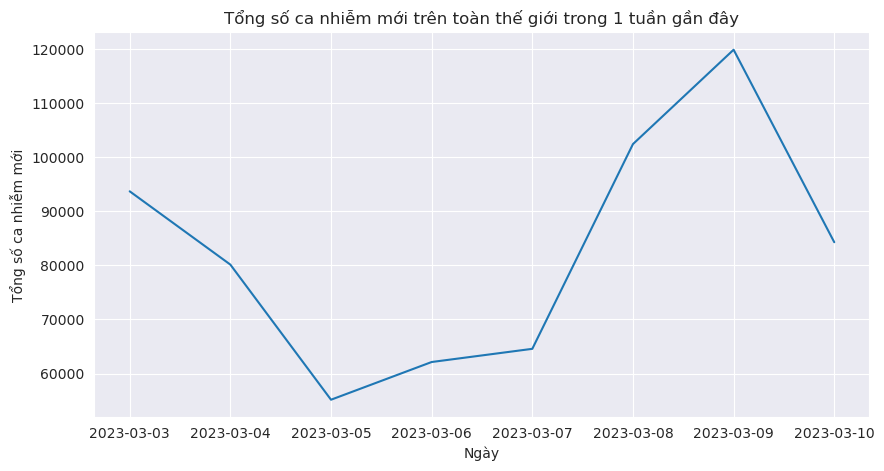

In [9]:
#Vẽ biểu đồ đường thể hiện số ca nhiễm của từng ngày trong tuần sử dụng thư viện seaborn
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(x="Date", y="NewCases", data=df_allWorld)
plt.title('Tổng số ca nhiễm mới trên toàn thế giới trong 1 tuần gần đây')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm mới')
plt.show()

- **Comment on the results.**
    - According to the chart, we can see that worldwide the number of cases fluctuates continuously, but almost now the number of new infections is decreasing.
    - However, in some countries, the covid situation is still complicated with the total number of cases on the 2nd and 9th days being quite high with 120,000 cases.

(Here we only consider all the countries with the number of new infections, the countries with the new deaths will be added)

In [10]:
#Lấy ra top 10 quốc gia có số ca nhiễm mới trong ngày 09/03/2023
df_09_03 = df.loc[df['Date'] == '2023-03-09']
df_09_03 = df_09_03.sort_values(by='NewCases', ascending=False)
df_09_03 = df_09_03[['Country', 'NewCases']]
df_09_03 = df_09_03.head(10)
df_09_03

,Country,NewCases
1339,USA,15574
1087,South Korea,12798
1069,Russia,12320
655,Japan,11805
1240,Taiwan,11053
484,Germany,9621
160,Brazil,9467
70,Austria,6343
277,Costa Rica,5561
1033,Poland,3904


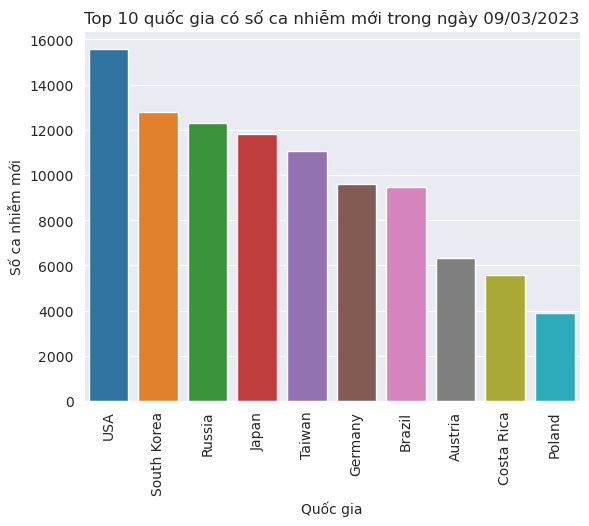

In [11]:
#Vẽ biểu đồ cột thể hiện top 10 quốc gia có số ca nhiễm mới trong ngày 09/03/2023
sns.set_style("darkgrid")
sns.barplot(x="Country", y="NewCases", data=df_09_03)
plt.title('Top 10 quốc gia có số ca nhiễm mới trong ngày 09/03/2023')
plt.xticks(rotation=90)
plt.xlabel('Quốc gia')
plt.ylabel('Số ca nhiễm mới')
plt.show()

- **Comment on the results.**
    - On March 9, 2023, the number of US infections reached nearly 160,000 cases, this is the highest level in the last 7 days. And decreasing are Korea, Rusia, Japan, ...
    - This shows that the covid situation in countries is still difficult and it is necessary to be more careful in the prevention of covid 19